<a href="https://colab.research.google.com/github/N3utron1/Sentiment-Analysis-Project/blob/main/Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import re
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import csv

In [ ]:
SA_test_df = pd.read_csv('/content/sample_data/twitter_data.csv')

#Preprocess the text
SA_test_df['text'] = SA_test_df['text'].str.lower().str.replace('[^a-zA-Z0-9]', ' ')

sentiment_counts = SA_test_df['sentiment'].value_counts()

#Extract features using TF-IDF
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(SA_test_df['text'])

SA_test_df.head()

,textID,text,sentiment
0,f87dea47db,last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"recession hit veronique branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - i like it!!,positive


In [ ]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, SA_test_df['sentiment'], test_size=0.2)

#Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

#Make predictions
predictions = model.predict(X_test)

#Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)

print("Model Accuracy:", accuracy)

Model Accuracy: 0.5388967468175389


In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(features, SA_test_df['sentiment'], test_size=0.2, random_state=42)

# Initialize the SVC model with a linear kernel
svm_model = SVC(kernel='poly')

# Wrap the SVM model in a One-vs-Rest classifier
ovr_model = OneVsRestClassifier(svm_model)

# Train the One-vs-Rest model on the training data
ovr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = ovr_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 47.67%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, SA_test_df['sentiment'], test_size=0.2, random_state=42)

# Create a LabelEncoder to convert sentiment labels to numerical values
label_encoder = LabelEncoder()

# Fit the encoder on the training labels and transform both train and test labels
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.2f}')

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.4405 - loss: 1.0336 - val_accuracy: 0.6095 - val_loss: 0.8416
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8753 - loss: 0.3618 - val_accuracy: 0.5795 - val_loss: 1.0927
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9760 - loss: 0.0797 - val_accuracy: 0.5936 - val_loss: 1.5938
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9976 - loss: 0.0129 - val_accuracy: 0.6219 - val_loss: 1.6205
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9989 - loss: 0.0055 - val_accuracy: 0.5972 - val_loss: 1.9146
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9997 - loss: 0.0021 - val_accuracy: 0.6007 - val_loss: 1.9976
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9997 - loss: 0.0013 - val_accuracy: 0.5989 - val_loss: 2.0579
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9999 - loss: 0.0011 - val_accuracy: 0.6007 - val_loss

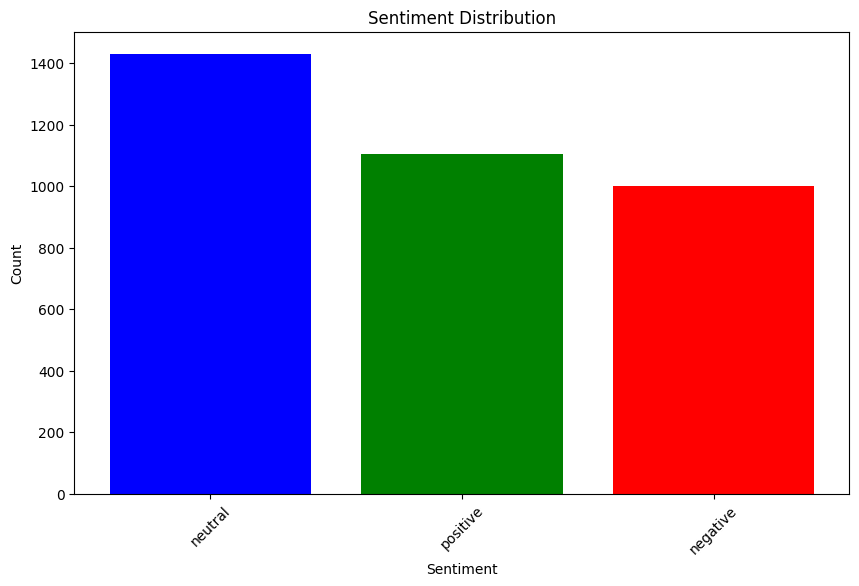

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['blue', 'green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Text cleaning
#Removing certian characters
characters_to_remove = r'[^\w\s]'
SA_test_df['cleaned_text'] = SA_test_df['text'].str.replace(characters_to_remove, '', regex=True)

#Removing certian words
words_to_remove = ['i', 'the', 'a', 'and', 'to', 'you', 'my', 'for', 'me', 'be', 'so']
pattern = r'\b{}\b'.format('|'.join(words_to_remove))
SA_test_df['cleaned_text'] = SA_test_df['cleaned_text'].str.replace(pattern, '', regex=True)

#Cleaning all 1 - 3 letter words.
SA_test_df['cleaned_text'] = SA_test_df['cleaned_text'].str.replace(r'\b[a-zA-Z]{1,3}\b', '', regex=True)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-51-ed6b49cdf007>:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_neutral_df = negative_df[~neutral_df['token'].isin(positive_df['token'])


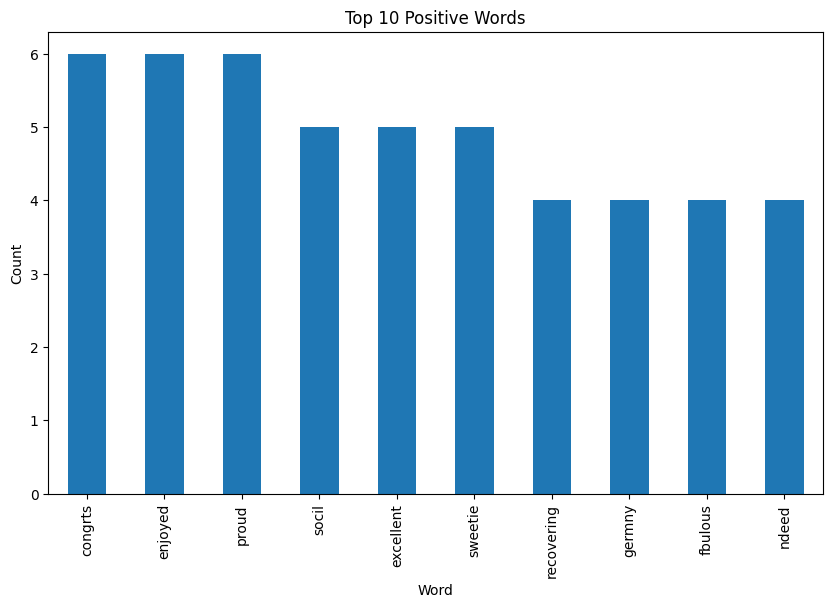

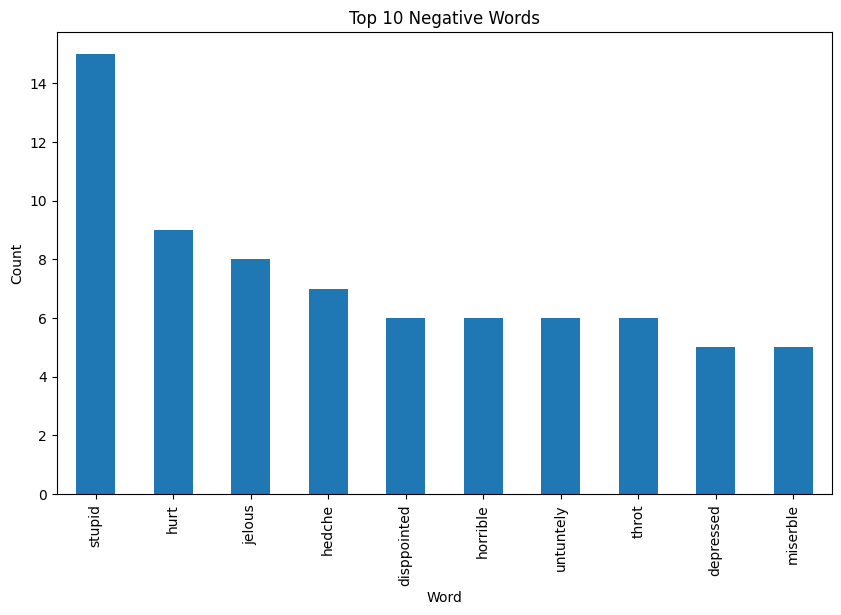

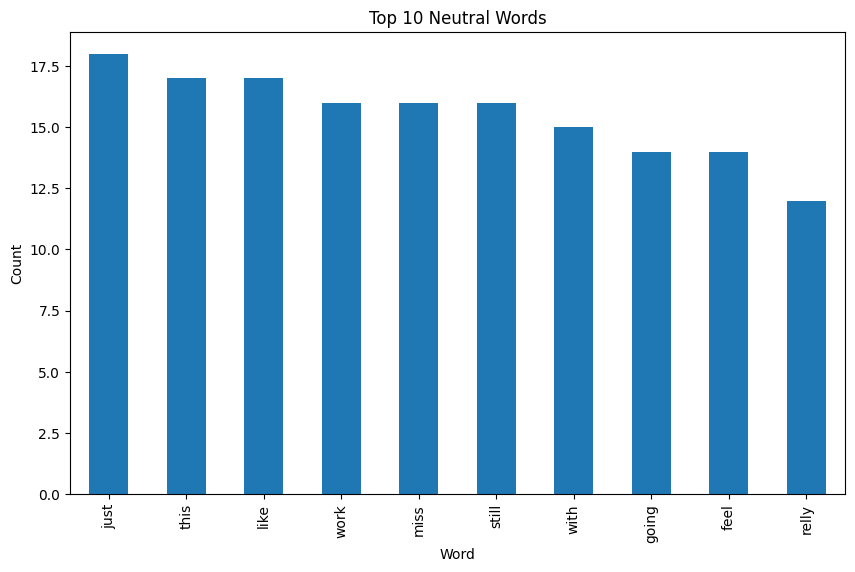

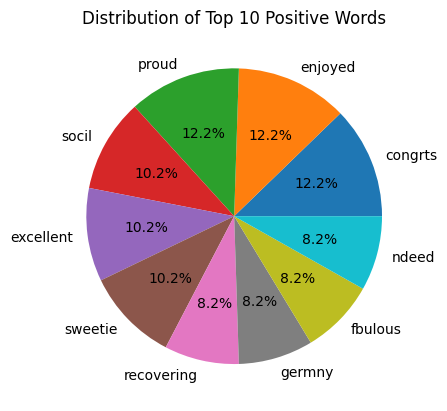

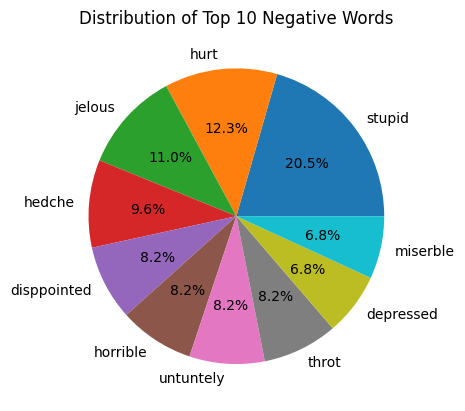

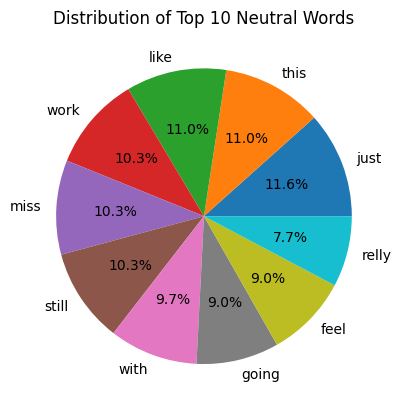

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

#Download tokenizer if not already installed
nltk.download('punkt')

#Filter data by sentiment
positive_texts = SA_test_df[SA_test_df['sentiment'] == 'positive']['cleaned_text']
negative_texts = SA_test_df[SA_test_df['sentiment'] == 'negative']['cleaned_text']
neutral_texts = SA_test_df[SA_test_df['sentiment'] == 'neutral']['cleaned_text']

#Tokenize and flatten texts
positive_tokens = [word_tokenize(text) for text in positive_texts]
positive_tokens = [token for sublist in positive_tokens for token in sublist]

negative_tokens = [word_tokenize(text) for text in negative_texts]
negative_tokens = [token for sublist in negative_tokens for token in sublist]

neutral_tokens = [word_tokenize(text) for text in neutral_texts]
neutral_tokens = [token for sublist in neutral_tokens for token in sublist]

#Create DataFrames
positive_df = pd.DataFrame({'token': positive_tokens})
negative_df = pd.DataFrame({'token': negative_tokens})
neutral_df = pd.DataFrame({'token': neutral_tokens})

#Unique word filter
new_positive_df = positive_df[~positive_df['token'].isin(negative_df['token'])
 & ~positive_df['token'].isin(neutral_df['token'])]

new_negative_df = negative_df[~negative_df['token'].isin(positive_df['token'])
 & ~negative_df['token'].isin(neutral_df['token'])]

new_neutral_df = negative_df[~neutral_df['token'].isin(positive_df['token'])
 & ~neutral_df['token'].isin(negative_df['token'])]

#Count word frequencies
#positive_counts = positive_df['token'].value_counts()
new_positive_counts = new_positive_df['token'].value_counts()
#negative_counts = negative_df['token'].value_counts()
new_negative_counts = new_negative_df['token'].value_counts()
#neutral_counts = neutral_df['token'].value_counts()
new_neutral_counts = new_neutral_df['token'].value_counts()

#Select top 10 words
top_10_positive = new_positive_counts.head(10)
top_10_negative = new_negative_counts.head(10)
top_10_neutral = new_neutral_counts.head(10)

#Create bar charts
top_10_positive.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 10 Positive Words')
plt.show()

top_10_negative.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 10 Negative Words')
plt.show()

top_10_neutral.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Word')
plt.ylabel('Count')
plt.title('Top 10 Neutral Words')
plt.show()

plt.pie(top_10_positive, labels=top_10_positive.index, autopct='%1.1f%%')
plt.title('Distribution of Top 10 Positive Words')
plt.show()

plt.pie(top_10_negative, labels=top_10_negative.index, autopct='%1.1f%%')
plt.title('Distribution of Top 10 Negative Words')
plt.show()

plt.pie(top_10_neutral, labels=top_10_neutral.index, autopct='%1.1f%%')
plt.title('Distribution of Top 10 Neutral Words')
plt.show()